# Veri Bilimi icin istatistik

#### 01- Ornek Teorisi
#### 02- Betimsel istatistikler
#### 03- Guven Araliklari
#### 04- Olasilik Dagilimlari
#### 05- Hipotez Testleri
#### 06- Varyans Analizi
#### 07- Korelasyon Analizi

Yeni Kutuphaneler

01 - researchpy
!pip install researchpy
import researchpy as rp

02 - statsmodels.stats.api
import statsmodels.stats.api as sms



# <font color=red>01 - Ornek Teorisi<font>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

# Grafik Ayarlari
# Arka tarf cizgili olur
sns.set_theme(style="whitegrid")

import warnings
warnings.simplefilter(action='ignore')

In [2]:
# Amac 10.000 kisilik bir ilcenin Yas ortalamasini bulmak

# 0 - 80 yas arliginda random 10.000 sayi olustur
populasyon = np.random.randint(0, 80, 10000)

In [3]:
populasyon[0:10]

array([23, 16, 28, 37,  1, 79, 53, 64,  7,  9])

### 1.1. Orneklem Cekimi

In [4]:
# Her orneklem cekiminde ayni populasyon ve orneklemi cekecek,bu yuzden seed kullanilir.
# Not : 115 onemli degil, istedigin sayi gir

np.random.seed(115)
orneklem = np.random.choice(a= populasyon, size= 100)
orneklem[0:10]

array([21, 60, 30,  9, 78, 39, 60,  3, 72, 61])

In [5]:
#orneklem Ortalama

orneklem.mean()

44.79

In [6]:
#Populasyon Ortalama ==> Dikkat ikisi ne kadar da yakin !!!!

populasyon.mean()

39.755

### 1.2. Orneklem Dagilimi

In [7]:
np.random.seed(10)
orneklem1 = np.random.choice(a= populasyon, size= 100)
orneklem2 = np.random.choice(a= populasyon, size= 100)
orneklem3 = np.random.choice(a= populasyon, size= 100)
orneklem4 = np.random.choice(a= populasyon, size= 100)
orneklem5 = np.random.choice(a= populasyon, size= 100)
orneklem6 = np.random.choice(a= populasyon, size= 100)
orneklem7 = np.random.choice(a= populasyon, size= 100)
orneklem8 = np.random.choice(a= populasyon, size= 100)
orneklem9 = np.random.choice(a= populasyon, size= 100)
orneklem10 = np.random.choice(a= populasyon, size= 100)

#### Bu 10 Orneklemenin ortalamasi hesaplanir

In [8]:
list1 = [orneklem1, orneklem2, orneklem3, orneklem4, orneklem5, orneklem6, orneklem7,orneklem8,
        orneklem9, orneklem10]
toplam  = 0
for i in list1:
    toplam+= i.mean()
    print(i.mean())
print('Ortalamasi = ', toplam/10)

42.76
38.06
38.73
37.88
39.03
40.22
34.84
40.75
33.73
37.69
Ortalamasi =  38.369


In [9]:
orneklem1.mean()

42.76

In [10]:
orneklem2.mean()

38.06

In [11]:
orneklem4.mean()

37.88

# <font color=red>02 - Betimsel istatistikler<font>

In [12]:
import seaborn as sns
tips = sns.load_dataset('tips')
df = tips.copy()
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [13]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
total_bill,244.0,19.785943,8.902412,3.07,13.3475,17.795,24.1275,50.81
tip,244.0,2.998279,1.383638,1.00,2.0000,2.900,3.5625,10.00
size,244.0,2.569672,0.951100,1.00,2.0000,2.000,3.0000,6.00


### Yeni Kutuphane inidirdik ===>  !pip install researchpy


In [14]:
!pip install researchpy
import researchpy as rp

In [15]:
# Numeric Degiskenler icin summary_cont

# -----Default ayarlari-------
# summary_cont(group1, conf = 0.95, decimals = 4) ===> decimal = ondalik 4

# Variable  = Degiskenler
# N         = Gozlem Sayisi
# Mean      = Ortalama
# SD        = Standart Sapma
# SE        = Standart Hatasi
# %95 Confindence interval = Guven Araligi ===> (18.6633 - 20.9086)

rp.summary_cont(df[['total_bill', 'tip', 'size']])

,Variable,N,Mean,SD,SE,95% Conf.,Interval
0,total_bill,244.0,19.7859,8.9024,0.5699,18.6633,20.9086
1,tip,244.0,2.9983,1.3836,0.0886,2.8238,3.1728
2,size,244.0,2.5697,0.9511,0.0609,2.4497,2.6896


In [16]:
# Kategorik Degiskenler icin summary_cat

# -----Default ayarlari-------
#summary_cat(group1, ascending= False)

rp.summary_cat(df[['sex', 'smoker', 'day', 'time']])

,Variable,Outcome,Count,Percent
0,sex,Male,157,64.34
1,,Female,87,35.66
2,smoker,No,151,61.89
3,,Yes,93,38.11
4,day,Sat,87,35.66
5,,Sun,76,31.15
6,,Thur,62,25.41
7,,Fri,19,7.79
8,time,Dinner,176,72.13
9,,Lunch,68,27.87


## <font color=blue>Kovaryans (Covaryans)<font>

In [17]:
# Kovaryans = iki degiskenin iliskilerinin degisimi

df[['tip', 'total_bill']].cov()

,tip,total_bill
tip,1.914455,8.323502
total_bill,8.323502,79.252939


## <font color=blue>Korelasyon (Corelasyon)<font>

In [18]:
# Korelasyon = Degiskenler arasindaki iliski (-1, 0, 1) 

df[['tip', 'total_bill']].corr()

,tip,total_bill
tip,1.000000,0.675734
total_bill,0.675734,1.000000


In [19]:
# Not:  Tip ile Total_bill arasinda orta siddete pozitif yonlu Korelasyon var (0.67)

In [20]:
### Korelasyon Grafigi

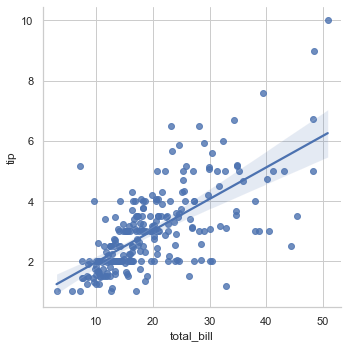

In [21]:
sns.lmplot(x= 'total_bill', y= 'tip', data= df);

# <font color=red>03 - Guven Araligi<font>

In [22]:
# Problem :
# CEO fiyat belirleme konusunda bilimsel bir dayanak ve esneklik istiyor

# Detaylar:
# 1 - Satici , alici ve urun var.
# 2 - Alicilara urune ne kadar ucret odersiniz diye soruluyor.
# 3 - Optimum fiyat bilimsel ve esnek olarak bulunmak isteniyor.

In [23]:
fiyatlar = np.random.randint(10, 110, 1000)
fiyatlar.mean()

58.492

### Yeni Kutuphane ekledik ====> statsmodels.stats.api

In [24]:
import statsmodels.stats.api as sms

In [25]:
# confidence interval (guven araligi)

sms.DescrStatsW(fiyatlar).tconfint_mean()  

(56.67953887736034, 60.30446112263965)

In [26]:
# Not : Kullanicilarin urunu almak icin odemeyi goze aldigi fiyat;
# istatistiksel olalarak %95 guvenilirlik ile 56 - 60 arasindadir demek

# alfa ile ilgilenmiyoruz (simdilik), Hata Payin hep %5 alacagiz , sistemde default olarak %95 tanimli zaten

# <font color=red>04 - Olasilik Dagilimlari<font>
#### <font color=red>Belirsizlik altinda karar vermeye calisiyoruz ! <font>

## <font color=blue>4.1. - Bernoulli Dagilimi<font>  

${\displaystyle f(k;p)=p^{k}(1-p)^{1-k}\quad {\text{for }}k\in \{0,1\}}$


${\displaystyle \operatorname {E} \left(X\right)=p}$

$\operatorname {Var} [X]=pq=p(1-p)$

#### Yeni Kutuphane ekledik ====> from scipy.stats import bernoulli

In [27]:
# Olasilik Dagilimi islemleri icin Scipy kullanilir

from scipy.stats import bernoulli

In [28]:
#p=  Tura gelme olasiligi (Biz verdik bunu , sonuca ulasmisiz gibi yaptik)

p = 0.6

In [29]:
#pmf = probability mass func.(olasilik kutle fonk.)

rv = bernoulli(p)
rv.pmf(k = 1) # Tura olma olasiligi                

0.6

In [30]:
rv.pmf(k = 0)  # Yazi olma olasiligi

0.4

## <font color=blue>4.2. - Buyuk Sayilar Yasasi<font> 

In [31]:
# rng = np.random.RandomState(123)  ===> Random islemlerini sabitlemek icin (np.random.seed(115) ayni)

rng = np.random.RandomState(123)
for i in range(1,21):
    deney_sayisi = 2**i
    yazi_turalar = rng.randint(0, 2, size= deney_sayisi)
    yazi_olasiliklari = np.mean(yazi_turalar)
    print('Atis Sayisi: ', deney_sayisi, '----', 'Yazi olasiligi: %.2f' % (yazi_olasiliklari * 100))

Atis Sayisi:  2 ---- Yazi olasiligi: 50.00
Atis Sayisi:  4 ---- Yazi olasiligi: 0.00
Atis Sayisi:  8 ---- Yazi olasiligi: 62.50
Atis Sayisi:  16 ---- Yazi olasiligi: 43.75
Atis Sayisi:  32 ---- Yazi olasiligi: 46.88
Atis Sayisi:  64 ---- Yazi olasiligi: 56.25
Atis Sayisi:  128 ---- Yazi olasiligi: 50.78
Atis Sayisi:  256 ---- Yazi olasiligi: 52.73
Atis Sayisi:  512 ---- Yazi olasiligi: 52.93
Atis Sayisi:  1024 ---- Yazi olasiligi: 50.20
Atis Sayisi:  2048 ---- Yazi olasiligi: 48.58
Atis Sayisi:  4096 ---- Yazi olasiligi: 49.49
Atis Sayisi:  8192 ---- Yazi olasiligi: 49.58
Atis Sayisi:  16384 ---- Yazi olasiligi: 49.96
Atis Sayisi:  32768 ---- Yazi olasiligi: 50.00
Atis Sayisi:  65536 ---- Yazi olasiligi: 49.68
Atis Sayisi:  131072 ---- Yazi olasiligi: 49.97
Atis Sayisi:  262144 ---- Yazi olasiligi: 50.13
Atis Sayisi:  524288 ---- Yazi olasiligi: 50.01
Atis Sayisi:  1048576 ---- Yazi olasiligi: 50.09


## <font color=blue>4.3. - Binom Dagilimi<font> 

${\displaystyle f(k;n,p)={n \choose k}p^{k}(1-p)^{n-k}}$, k = 0, 1, 2, ...,n


${\displaystyle \operatorname {E} (X)=np}$


${\displaystyle \operatorname {Var} (X)=np(1-p)}$

#### Yeni Kutuphane ekledik ====> from scipy.stats import binom

In [32]:
from scipy.stats import binom

#### Problem : bir sirkette verilen 100 Reklami 1,5,10 kisinin gorme olasiligi
#### Bilinen deger p = 0.01 (binom olasilik degeri biliniyor)

#### p = BINOM Olasilik degeri
#### n = Deneme Sayisi
#### k = rassal degiskenin alacagi degerler (1,5,10)  ===> k veya x ayni seyler

In [33]:
p = 0.01
n = 100
rv = binom(n,p)

print(rv.pmf(1))
print(rv.pmf(5))
print(rv.pmf(10))

0.36972963764972655
0.002897787123761478
7.006035693977194e-08


## <font color=blue>4.4. - Poisson Dagilimi<font>

${\displaystyle f(x,\lambda )={\frac {\lambda ^{x}e^{-\lambda }}{x!}}\,\!}$,  x = 0,1,2,...,n

#### Yeni Kutuphane ekledik ====> from scipy.stats import poisson

In [34]:
from scipy.stats import poisson

In [35]:
lambda_ = 0.1

In [36]:
# Problem : Bir sirkette hatali ilan girisi hesaplanmak isteniyor

# Bilinen deger Lamda = 0.1 (ortalama hata sayisi)
# x = rassal degerin alacagi deger (0, 3, 5)  ===> Hic hata olmamasi, 3 hata olmasi , 5 hata olasi durumu

rv = poisson(mu= lambda_)
print(rv.pmf(k= 0))
print(rv.pmf(k= 3))
print(rv.pmf(k= 5))

0.9048374180359595
0.00015080623633932676
7.54031181696634e-08


## <font color=blue>4.5. - Normal Dagilim<font>
    
${\displaystyle f(x\mid \mu ,\sigma ^{2})={\frac {1}{\sqrt {2\pi \sigma ^{2}}}}e^{-{\frac {(x-\mu )^{2}}{2\sigma ^{2}}}}}$

* $\mu$  ortalama ya da dağılımın beklenen değeri

* ${\displaystyle \sigma }$  standart sapma

* ${\displaystyle \sigma ^{2}}$ varyans

#### Yeni Kutuphane ekledik ====> from scipy.stats import norm

In [37]:
from scipy.stats import norm

In [38]:
# Problem : Bir sirkette ortalama satis =  80k, standart sapma = 5k,
#Dagilim =  Normal (Hipotez ve benzeri testler sonucu dagilimin normal oldugu bulunur)

#90K'dan fazla satis yapma olasiligi

1-norm.cdf(90, 80, 5)    # ===> 1- norm.cdf(istenen_deger, ortalama, standart_sapma )

0.02275013194817921

In [39]:
#70K'dan fazla satis yapma olasiligi

1-norm.cdf(70, 80, 5)

0.9772498680518208

In [40]:
#73K'den az satis yapma olasiligi  (Dikkat 1 -norm yapmadik !!!!)

norm.cdf(73, 80, 5)

0.08075665923377107

In [41]:
# 85 ile 90 arasinda olma olasiligi

(1 - norm.cdf(85, 80, 5)) - (1- norm.cdf(90, 80, 5))

0.13590512198327787

In [42]:
# 85 ile 90 arasinda olma olasiligi (Farkli)

norm.cdf(90, 80, 5) - norm.cdf(85, 80, 5)

0.13590512198327787

# <font color=red>05 - Hipotez Testleri<font>

## <font color=red>05.A - Tek Orneklem T Testi (Parametric One Sample T Test )<font>

Örnek ortalamasına ilişkin test yapmak için kullanılır.

**Hipotezler:**

<d><i>H</i><sub>0</sub>: <i>μ</i> = <i>50</i></d>   
<d><i>H</i><sub>1</sub>: <i>μ</i> ≠ <i>50</i></d><br><br>

<d><i>H</i><sub>0</sub>: <i>μ</i> <= <i>50</i></d><br>
<d><i>H</i><sub>1</sub>: <i>μ</i> > <i>50</i></d><br><br>

<d><i>H</i><sub>0</sub>: <i>μ</i> >= <i>50</i></d><br>
<d><i>H</i><sub>1</sub>: <i>μ</i> < <i>50</i></d><br><br>




<table></table>

**Test İstatistiği:**

${\displaystyle t={\frac {{\bar {x}}-\mu _{0}}{\frac {s}{\sqrt {n}}}}}$

#### Problem : internet sitemizde gecirilen surenin 170 sn fazla mi az mi oldugu kontrol edilmek isteniyor.
##### H0  = 170
##### H1 != 170

In [43]:
olcumler = np.array([17, 160, 234, 149, 145, 107, 197, 75, 201, 225, 211, 119, 
              157, 145, 127, 244, 163, 114, 145,  65, 112, 185, 202, 146,
              203, 224, 203, 114, 188, 156, 187, 154, 177, 95, 165, 50, 110, 
              216, 138, 151, 166, 135, 155, 84, 251, 173, 131, 207, 121, 120])

In [44]:
olcumler[0:10]

array([ 17, 160, 234, 149, 145, 107, 197,  75, 201, 225])

#### Yeni Kutuphane ekledik ====> from scipy.stats import stats

In [45]:
import scipy.stats as stats

In [46]:
# Farkli bir Describe Methodu kullandik (DataFrame olmadan describe yapabilmek icin(numpy formatinin describe i))

# nobs = gozlem sayisi
# skewnes = carpiklik  (sag - sol)
# kurtosis = basiklik  (alt - ust)

stats.describe(olcumler)

DescribeResult(nobs=50, minmax=(17, 251), mean=154.38, variance=2578.0363265306123, skewness=-0.32398897278694483, kurtosis=-0.05849823498415985)

In [47]:
# mean = 154 (ortalama gecirilen sure) o zaman neden 170 arastiriyoruz ?
# Cevap : Bu olcumler tesadufi olusamaz mi, orneklem yanlis olamaz mi diye.

## <font color=blue>5.1 Varsayimlar<font>

### <font color=blue>5.A.1.1 Normallik Varsayimi (Orneklem dagiliminin dagilimi normaldir)<font>

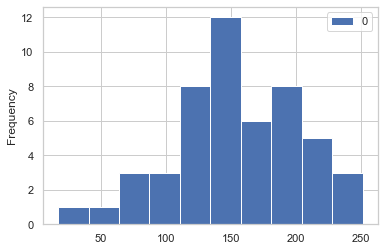

In [48]:
# histogram

pd.DataFrame(olcumler).plot.hist();

#### Yeni Kutuphane ekledik ====> import pylab

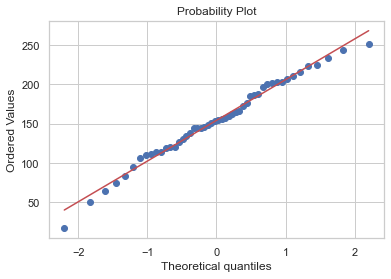

In [49]:
#qqplot
import pylab
stats.probplot(olcumler, dist="norm", plot=pylab)
pylab.show()

## <font color=blue>Shapiro-Wilks Testi<font>
H0: Örnek dağılımı ile teorik normal dağılım arasında istatistiksel olarak anlanmli bir farklilik yoktur

H1: ... fark vardır
    
#### <font color=red>Not : H0 i reddetmek istemiyoruz , bu yuzden pvalue > 0.05 olmali !!!!!<font>

#### Yeni Kutuphane ekledik ====> from scipy.stats import shapiro

In [50]:
from scipy.stats import shapiro

In [51]:
shapiro(olcumler)

ShapiroResult(statistic=0.9853105545043945, pvalue=0.7848747968673706)

In [52]:
print('Test Hesap istatistigi: ', shapiro(olcumler)[0])
print('Hesaplanan P - Value: ', shapiro(olcumler)[1])

Test Hesap istatistigi:  0.9853105545043945
Hesaplanan P - Value:  0.7848747968673706


## Testin Uygulanmasi

In [53]:
stats.ttest_1samp(olcumler, popmean= 170)

Ttest_1sampResult(statistic=-2.1753117985877966, pvalue=0.034460415195071446)

Not: P - Value < 0.05 oldugu icin , internet sitesinde gecirilen sure 170'tir.

H0 = 170 dogrudur. (ret edilmez)

H1 ≠ 170 yanlistir. (ret edilir)

## <font color=red>05.B - Nonparametrik Tek Orneklem Testi <font>

#### Yeni Kutuphane ekledik ====> from statsmodels.stats.descriptivestats import sign_test

In [54]:
from statsmodels.stats.descriptivestats import sign_test

In [55]:
sign_test(olcumler, 170)

(-7.0, 0.06490864707227217)

Not1 : Genellikle solda Test istatistigi , sagdaki de P -Value degeridir.

Not2 : Dagilim carpik oldugunda ortalama ve parametrik test kullanilamaz. Eger elimizdeki olcumler paratmetrik varsayimlari saglamasaydi nonparametrik testi yapar ve P-Value degerine gore yorum yapardik.

Not3 : P - Value < 0.05 degil ......????? 

## <font color=red>05.C - Tek Orneklem Oran Testi <font>
    
H0: p = 0.125
    
H1: p != 0.125

Problem : Bir reklamin donusum orani 0.125 olarak bize bildirilmis. Bunu kontrol etmek istiyoruz

Detaylar: 500 kisi dis mecracada reklama tiklamis , 40 tanesi alisveris yapmis.

ornek uzerinden donusum orani : 50 / 400 = 0.08 (Yani 0.125 yanlis demek, bunu ispatlayacagiz)

#### Yeni Kutuphane ekledik ====> from statsmodels.stats.proportion import proportions_ztest

In [56]:
from statsmodels.stats.proportion import proportions_ztest

In [57]:
count = 40
nobs = 500
value = 0.125

In [58]:
proportions_ztest(count, nobs, value)

(-3.7090151628513017, 0.0002080669689845979)

In [59]:
# Sonuc = P-Value < 0.05 old. icin H0 ret edilir.

## <font color=red>05.D - Bagimsiz iki Orneklem  Testi (Parametrik)<font>
    
H0: M1 = M2
    
H1: M1!= M2
    
Problem : Yeni ML uygulanan sistemin geliri artirip artirmadigini kontrol ediyoruz , eski sistem ile elde edilen gelirleri, yeni ML ile elde edilen gelirler ile (ortalama) karsilastiriyoruz.

In [60]:
# Veri Tipi I

In [61]:
A = pd.DataFrame([30,27,21,27,29,30,20,20,27,32,35,22,24,23,25,27,23,27,23,
        25,21,18,24,26,33,26,27,28,19,25])

B = pd.DataFrame([37,39,31,31,34,38,30,36,29,28,38,28,37,37,30,32,31,31,27,
        32,33,33,33,31,32,33,26,32,33,29])


A_B = pd.concat([A, B], axis = 1)
A_B.columns = ["A","B"]

A_B.head()

,A,B
0,30,37
1,27,39
2,21,31
3,27,31
4,29,34


In [62]:
# Veri Tipi II

#En zor sekli duzenli sekli ile duzenliyebilirsin

In [63]:
A = pd.DataFrame([30,27,21,27,29,30,20,20,27,32,35,22,24,23,25,27,23,27,23,
        25,21,18,24,26,33,26,27,28,19,25])

B = pd.DataFrame([37,39,31,31,34,38,30,36,29,28,38,28,37,37,30,32,31,31,27,
        32,33,33,33,31,32,33,26,32,33,29])

#A ve A'nın grubu                     
GRUP_A = np.arange(len(A))
GRUP_A = pd.DataFrame(GRUP_A)
GRUP_A[:] = "A"
A = pd.concat([A, GRUP_A], axis = 1)

#B ve B'nin Grubu
GRUP_B = np.arange(len(B))
GRUP_B = pd.DataFrame(GRUP_B)
GRUP_B[:] = "B"
B = pd.concat([B, GRUP_B], axis = 1)

#Tum veri
AB = pd.concat([A,B])
AB.columns = ["gelir","GRUP"]
print(AB.head())
print(AB.tail())

   gelir GRUP
0     30    A
1     27    A
2     21    A
3     27    A
4     29    A
    gelir GRUP
25     33    B
26     26    B
27     32    B
28     33    B
29     29    B


In [64]:
A.head(3)

,0,0
0,30,A
1,27,A
2,21,A


In [65]:
B.head(3)

,0,0
0,37,B
1,39,B
2,31,B


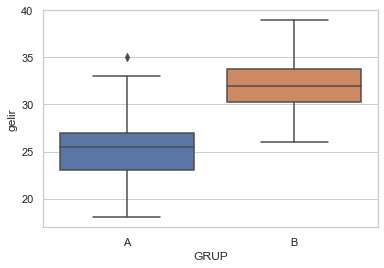

In [66]:
sns.boxplot(x= 'GRUP', y= 'gelir', data= AB);

# Varsayim Kontrolu

In [67]:
A_B.head()

,A,B
0,30,37
1,27,39
2,21,31
3,27,31
4,29,34


In [68]:
AB.head()

,gelir,GRUP
0,30,A
1,27,A
2,21,A
3,27,A
4,29,A


### Normallik Varsayimi (Shaprio Testi)

In [69]:
shapiro(A_B.A)  # A icin P-Value >0.05 old. icin H0 ret edilmez , dagilimlar aynidir

ShapiroResult(statistic=0.9789242148399353, pvalue=0.7962799668312073)

In [70]:
shapiro(A_B.B)  # B icin P-Value >0.05 old. icin H0 ret edilmez , dagilimlar aynidir

ShapiroResult(statistic=0.9561261534690857, pvalue=0.2458445429801941)

### Varyans Homojenligi Varsayimi

H0: varyanslar Homojendir

H1: varyanslar Hom. degildir.

In [71]:
stats.levene(A_B.A, A_B.B)  # P-Value >0.05 old. icin H0 ret edilmez, Vary. Homojendir

LeveneResult(statistic=1.1101802757158004, pvalue=0.2964124900636569)

## Hipotez Testin Uygulanmasi (A\B Testi)

In [72]:
stats.ttest_ind(A_B['A'], A_B['B'], equal_var= True)

Ttest_indResult(statistic=-7.028690967745927, pvalue=2.6233215605475075e-09)

In [73]:
test_istatistigi, pvalue = stats.ttest_ind(A_B["A"], A_B["B"], equal_var=True)
print('Test İstatistiği = %.4f, p-değeri = %.4f' % (test_istatistigi, pvalue))

Test İstatistiği = -7.0287, p-değeri = 0.0000


--------------------------- Sonuc -------------------------------------

1-  Iki sistemin gelir karsilastirilmasi yapiliyor. (ortalamalari karsilastiriliyor)

2 - P-Value degeri < 0.05 old. icin H0 ret edilmez.

3-  
H0: M1 = M2   (gelir ortalamari esittir)
    
H1: M1!= M2   (gelir ort. esit degildir.)
    
4 - iki sistemin gelir ortalamalari esit degildir SONUCUNA ulasiyoruz.

## <font color=red>05.E -  Nonparametrik Bagimsiz iki Orneklem Testi <font>

Ne zaman kullainilir:

Hem Normallik varsayimi, hem de Varyans Homejenligi saglanmiyorsa 
Nonparametrik iki Orneklem Testi yapilir.

In [74]:
stats.mannwhitneyu(A_B['A'], A_B['B'])

MannwhitneyuResult(statistic=89.5, pvalue=9.557950378612535e-08)

In [75]:
test_istatistigi, pvalue = stats.mannwhitneyu(A_B['A'], A_B['B'])
print('Test İstatistiği = %.4f, p-değeri = %.4f' % (test_istatistigi, pvalue))

Test İstatistiği = 89.5000, p-değeri = 0.0000


Sonuc: p < 0.05 oldugu icin 
m1 = m2 (mu) ret edilir,
Hem parametrik yaklasim ile hemde nonparametrik yaklasim ile bu farki ispat ettik.

# <font color=red>05.F - Parametrik Bagimli iki Orneklem Testi <font>

Problem : Bir grup calisana egitim veriliyor , oncesi ve sonrasi performans farki karsilastiriliyor.

H0 : Mo  = M1  (Performans ort. fark yoktur.) 

H1 : Mo != M1

In [76]:
oncesi = pd.DataFrame([123,119,119,116,123,123,121,120,117,118,121,121,123,119,
            121,118,124,121,125,115,115,119,118,121,117,117,120,120,
            121,117,118,117,123,118,124,121,115,118,125,115])

sonrasi = pd.DataFrame([118,127,122,132,129,123,129,132,128,130,128,138,140,130,
             134,134,124,140,134,129,129,138,134,124,122,126,133,127,
             130,130,130,132,117,130,125,129,133,120,127,123])

In [77]:
oncesi[0:5]

,0
0,123
1,119
2,119
3,116
4,123


In [78]:
sonrasi[0:5]

,0
0,118
1,127
2,122
3,132
4,129


In [79]:
np.arange(len(oncesi))

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39])

In [80]:
#BIRINCI VERI SETI
AYRIK = pd.concat([oncesi, sonrasi], axis = 1)
AYRIK.columns = ["ONCESI","SONRASI"]
print("'AYRIK' Veri Seti: \n\n ", AYRIK.head(), "\n\n")


#IKINCI VERI SETI
#ONCESI FLAG/TAG'INI OLUSTURMA
GRUP_ONCESI = np.arange(len(oncesi))
GRUP_ONCESI = pd.DataFrame(GRUP_ONCESI)
GRUP_ONCESI[:] = "ONCESI"
#FLAG VE ONCESI DEGERLERINI BIR ARAYA GETIRME
A = pd.concat([oncesi, GRUP_ONCESI], axis = 1)
#SONRASI FLAG/TAG'INI OLUSTURMA
GRUP_SONRASI = np.arange(len(sonrasi))
GRUP_SONRASI = pd.DataFrame(GRUP_SONRASI)
GRUP_SONRASI[:] = "SONRASI"

#FLAG VE SONRASI DEGERLERINI BIR ARAYA GETIRME
B = pd.concat([sonrasi, GRUP_SONRASI], axis = 1)

#TUM VERIYI BIR ARAYA GETIRME
BIRLIKTE = pd.concat([A,B])
BIRLIKTE

#ISIMLENDIRME
BIRLIKTE.columns = ["PERFORMANS","ONCESI_SONRASI"]
print("'BIRLIKTE' Veri Seti: \n\n", BIRLIKTE.head(), "\n")
print("'BIRLIKTE' Veri Seti: \n\n", BIRLIKTE.tail(2), "\n")

'AYRIK' Veri Seti: 

     ONCESI  SONRASI
0     123      118
1     119      127
2     119      122
3     116      132
4     123      129 


'BIRLIKTE' Veri Seti: 

    PERFORMANS ONCESI_SONRASI
0         123         ONCESI
1         119         ONCESI
2         119         ONCESI
3         116         ONCESI
4         123         ONCESI 

'BIRLIKTE' Veri Seti: 

     PERFORMANS ONCESI_SONRASI
38         127        SONRASI
39         123        SONRASI 



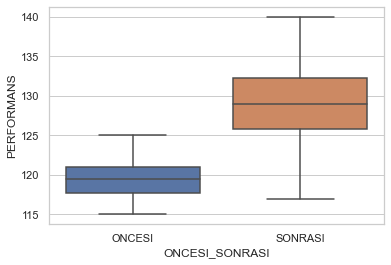

In [81]:
sns.boxplot(x= 'ONCESI_SONRASI', y= 'PERFORMANS', data= BIRLIKTE);

## Varsayim Kotrolleri

### Normallik Varsayimi

H0: .... dagilimlar arasinda fark yoktur. (P-Value > 0.05 ise dagilim normaldir.)

H1: .... dagilimlar arasinda fark vardir.

In [82]:
shapiro(AYRIK.ONCESI)

ShapiroResult(statistic=0.9543654918670654, pvalue=0.10722342133522034)

Sonuc : P-Values > 0.05 old. icin H0 ret edilmez , yani elimizdeki veri setinin dagilimi normaldir denir. 

In [83]:
shapiro(AYRIK.SONRASI)

ShapiroResult(statistic=0.9780087471008301, pvalue=0.6159457564353943)

Sonuc : P-Values > 0.05 old. icin H0 ret edilmez , yani elimizdeki veri setinin dagilimi normaldir denir. 

## Varyans Homojenligi Varsayimi

H0: varyanslar Homojendir. (P-Value > 0.05 ise varyans homojendir)

H1: varyanslar Hom. degildir.

In [84]:
stats.levene(AYRIK.ONCESI, AYRIK.SONRASI)

LeveneResult(statistic=8.31303288672351, pvalue=0.0050844511807370246)

Sonuc : P-Value < 0.05 old. H0 ret edilir, yani Varyans homojen degilgir. 

Ne Yapmali :
1 - Outlier lar cikarilabilir

2 - Goz ardi edilebilinir.

## Hipotez Testi

In [85]:
stats.ttest_rel(AYRIK.ONCESI, AYRIK.SONRASI)

Ttest_relResult(statistic=-9.281533480429937, pvalue=2.0235251764440722e-11)

In [86]:
test_istatistigi, pvalue = stats.ttest_rel(AYRIK.ONCESI, AYRIK.SONRASI)
print('Test istatistigi = %.4f, p-degeri = %.4f' % (test_istatistigi, pvalue))

Test istatistigi = -9.2815, p-degeri = 0.0000


# <font color=red>05.G - Nonparametrik Bagimli iki Orneklem Testi <font>

In [87]:
# Varsayimlar saglanmadigi dusunulurse

stats.wilcoxon(AYRIK.ONCESI, AYRIK.SONRASI)

WilcoxonResult(statistic=15.0, pvalue=2.491492033374464e-07)

In [88]:
test_istatistigi, pvalue = stats.ttest_rel(AYRIK.ONCESI, AYRIK.SONRASI)
print('Test istatistigi = %.4f\nP-degeri = %.4f' % (test_istatistigi, pvalue))

Test istatistigi = -9.2815
P-degeri = 0.0000


Sonuc : iki grup arasinda ist. olarak anlamli farklilik vardir. Neden ?

P-value < 0.05 old. icin H0 ret edilir . Ortalamalar esittir ret edilir. 

# <font color=red>05.H - iki Orneklem Oran Testi<font>

#### Yeni Kutuphane ekledik ====> from statsmodels.stats.proportion import proportions_ztest

In [89]:
from statsmodels.stats.proportion import proportions_ztest

Problem : 
Yesil Buton = 1000 goruntulenme , 300 tiklama 

Kirmizi Buton = 1100 goruntulenme , 250 tiklama

H0: Tiklama sayilari esittir.

In [90]:
basari_sayilari = np.array([300, 250])
gozlem_sayilari = np.array([1000, 1100])

In [91]:
proportions_ztest(count= basari_sayilari, nobs= gozlem_sayilari)

(3.7857863233209255, 0.0001532232957772221)

Sonuc : P-Value < 0.05 old. icin Ho ret edilir

# <font color=red>06 - Varyans Analizi <font>(ANOVA = ANALYSIS OF VARIANCE

H0: M1 = M2 = M3 (grup ortalamalari arasinda ist anl. farklilik yoktur) 

H1: Fark vardir.

In [92]:
A = pd.DataFrame([28,33,30,29,28,29,27,31,30,32,28,33,25,29,27,31,31,30,31,34,30,32,31,34,28,32,31,28,33,29])

B = pd.DataFrame([31,32,30,30,33,32,34,27,36,30,31,30,38,29,30,34,34,31,35,35,33,30,28,29,26,37,31,28,34,33])

C = pd.DataFrame([40,33,38,41,42,43,38,35,39,39,36,34,35,40,38,36,39,36,33,35,38,35,40,40,39,38,38,43,40,42])

dfs = [A, B, C]

ABC = pd.concat(dfs, axis=1)
ABC.columns = ['GRUP_A', 'GRUP_B', 'GRUP_C']
ABC.head()

,GRUP_A,GRUP_B,GRUP_C
0,28,31,40
1,33,32,33
2,30,30,38
3,29,30,41
4,28,33,42


## Varsayim Kontrolu

3 Tane Varsayim var:

    1. Gruplarin Bagimsizligi
    
    2. Normallik varsayimi (Shahprio)
    
    3. Varyans Homejenligi Varsayimi (leven Testi)

### Normallik Testi (shaprio)

In [93]:
shapiro(ABC.GRUP_A)

ShapiroResult(statistic=0.9697431921958923, pvalue=0.5321715474128723)

In [94]:
shapiro(ABC['GRUP_B'])

ShapiroResult(statistic=0.9789854884147644, pvalue=0.7979801297187805)

In [95]:
shapiro(ABC.GRUP_B)

ShapiroResult(statistic=0.9789854884147644, pvalue=0.7979801297187805)

### Varsayim Homejenligi Testi (levene)

In [96]:
stats.levene(ABC.GRUP_A, ABC.GRUP_B, ABC.GRUP_C)

LeveneResult(statistic=1.0267403645055275, pvalue=0.36247110117417064)

Alt tarafatkileri (levene) ben extra yaptim

In [97]:
stats.levene(ABC.GRUP_A, ABC.GRUP_B)

LeveneResult(statistic=1.9431949918849991, pvalue=0.16863992706910064)

In [98]:
stats.levene(ABC.GRUP_A, ABC.GRUP_C)

LeveneResult(statistic=1.2948480845442538, pvalue=0.25983525149338893)

In [99]:
stats.levene(ABC.GRUP_B, ABC.GRUP_C)

LeveneResult(statistic=0.0877126654064272, pvalue=0.7681632833983904)

## Varyans Analazi Hipotez Testi

In [100]:
from scipy.stats import f_oneway

In [101]:
f_oneway(ABC.GRUP_A, ABC.GRUP_B, ABC.GRUP_C)

F_onewayResult(statistic=74.69278140730431, pvalue=1.3079050746811477e-19)

SONUC = P-Value 0.05 den kucuk oldugu icin uc grup da esittir tezi ret edilir.

In [102]:
print('{:.5f}'.format(f_oneway(ABC.GRUP_A, ABC.GRUP_B, ABC.GRUP_C)[1]))

0.00000


In [103]:
ABC.describe().T

,count,mean,std,min,25%,50%,75%,max
GRUP_A,30.0,30.133333,2.224214,25.0,28.25,30.0,31.75,34.0
GRUP_B,30.0,31.700000,2.937862,26.0,30.00,31.0,34.00,38.0
GRUP_C,30.0,38.100000,2.808239,33.0,36.00,38.0,40.00,43.0


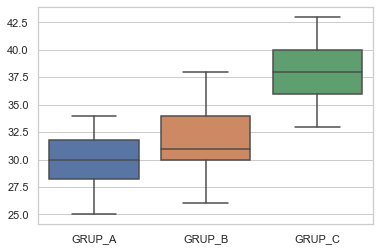

In [104]:
sns.boxplot(data = ABC);

## Nonparametrik Varyans Analiz Hipotiz Testi

In [105]:
from scipy.stats import kruskal

In [106]:
kruskal(ABC.GRUP_A, ABC.GRUP_B, ABC.GRUP_C)

KruskalResult(statistic=54.19819735523783, pvalue=1.7022015426175926e-12)

SONUC = P-Value 0.05 den kucuk oldugu icin uc grup da esittir tezi ret edilir.

Ama burda varsayimlar saglanmadigi varsayildi ve bu test yapildi.

# <font color=red>07 - Korelasyon Analizi <font>

H0:ro = 0 .... ro esittir sifir, yani iki degisken arasinda iliski yoktur (P-Value < 0.05 ise ret edilir , yani iliski vardir denir.)

H1:ro !=0 .... ro esitt degil sifir

Bahşiş veri seti:

total_bill: yemeğin toplam fiyatı (bahşiş ve vergi dahil)

tip: bahşiş

sex: ücreti ödeyen kişinin cinsiyeti (0=male, 1=female)

smoker: grupta sigara içen var mı? (0=No, 1=Yes)

day: gün (3=Thur, 4=Fri, 5=Sat, 6=Sun)

time: ne zaman? (0=Day, 1=Night)

size: grupta kaç kişi var?

In [107]:
df = sns.load_dataset('tips')
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [108]:
# Dikkat Total_bill icinde bill oldugu icin,
#tip ve total_bill korelasyonunu direkt yaparsak yaniltir.
# Bu yuzden total_bill den tip cikarilir

df['total_bill'] = df.total_bill - df.tip
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,15.98,1.01,Female,No,Sun,Dinner,2
1,8.68,1.66,Male,No,Sun,Dinner,3
2,17.51,3.50,Male,No,Sun,Dinner,3
3,20.37,3.31,Male,No,Sun,Dinner,2
4,20.98,3.61,Female,No,Sun,Dinner,4


In [109]:
#df.plot.scatter Grafigi

#df.plot.scatter("tip", "total_bill");

## Varsayim Kontrolu

In [110]:
# Nromallik Varsayimi

In [111]:
shapiro(df['tip'])

ShapiroResult(statistic=0.897811233997345, pvalue=8.20057563521992e-12)

In [112]:
shapiro(df.total_bill)

ShapiroResult(statistic=0.9135652184486389, pvalue=1.1060377613780759e-10)

Sonuc = Varsayimlar Ret edilir cunku ;

Tip ve Total_Bill icin;

P_Value < 0.05 oldugu icin normallik ret edilir, dagilim normal degildir.Bu yuzden Nonparametrik test olan spearman testi kullanilir. 


## Korelasyon Analiz Hipotez Testi (Parametrik)

### Korelasyin Kaysayisi 

In [113]:
df['tip'].corr(df['total_bill'])

0.5766634471096374

In [114]:
# Dikkat = Varsayim saglanmadigi icin (normallik varsayimi) spearman korelasyon kat sayisi hesaplanir

df['tip'].corr(df['total_bill'], method= 'spearman')

0.593691939408997

### Korelasyon Anlamlilik Testi

In [115]:
from scipy.stats.stats import pearsonr

In [116]:
pearsonr(df.tip, df.total_bill)

(0.5766634471096382, 5.018290084948277e-23)

Sonuc = Test istatistigi (corr katsayisi) : 0.5766634471096382 , p-value : 5.018290084948277e-23 

In [117]:
test_istatistigi, pvalue = stats.pearsonr(df["tip"],df["total_bill"])

print('Korelasyon Katsayısı = %.4f, p-değeri = %.4f' % (test_istatistigi, pvalue))

Korelasyon Katsayısı = 0.5767, p-değeri = 0.0000


## Nonparametrik Hipotez Testi

In [118]:
stats.spearmanr(df.tip, df.total_bill)

SpearmanrResult(correlation=0.593691939408997, pvalue=1.2452285137560276e-24)

Sonuc =

1 - Tip ve Totat_bill arasinda orta siddete pozitif iliski vardir.

2 - p_value < 0.05 oldugu icin Ho ret edilir, yani iliski yoktur ret edilir.

In [119]:
stats.kendalltau(df.tip, df.total_bill)

KendalltauResult(correlation=0.4400790074919885, pvalue=7.131027725873721e-24)

Sonuc = Kendalltau da corr. katsayisi daha dusuk cikmis, temkinli yaklasmis.

Ama burda gerekli varsayim saglanmadigi icin en GUVENILIR olani SPEARMAN testidir.